In [16]:
%load_ext autoreload
%autoreload 2
import numpy as np
import networkx as nx
from tqdm import tqdm
import matplotlib.pyplot as plt

import sys
sys.path.append('../src')

from graph_utils import *
from performance_utils import *
from metropolis import *
from houdayer_algorithm import *
from sim_util import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Specs:
  Number of nodes (N) = 600
  Degree of graph (d) = 4
  Intra-group connect param (a) = 7.2727272727272725
  Inter-group connect param (b) = 0.7272727272727273
  Group connect ratio (r) = b/a = 0.1
  Critical ratio (rc) = 0.3333333333333333 (for detectable communities)


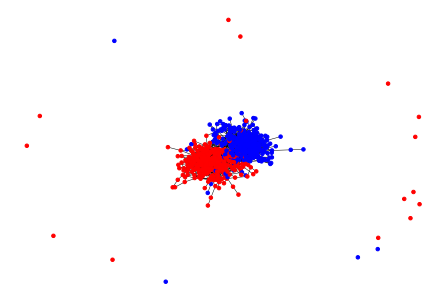

In [17]:
# Initialize random seed
np.random.seed(0)

# Define the parameters
N = 600      # number of nodes
d = 4       # degree

# Generate the basic parameters for simulation
a, b, r = generate_detectable_a_b(d, r=0.1)
display_spec(N,d,a,b,r)

true_group_label = generate_population(N)
G = graph_gen(true_group_label, a, b)

draw_graph(G, true_group_label)

## Start Simulation

In [18]:
# Initialize the vector to start searching
x1_init, x2_init = generate_population(N), generate_population(N)
# Obtain the adjacency matrix
Adj = nx.to_numpy_array(G)

chain_1 = Metropolis(Adj, a, b, x1_init)
chain_2 = Metropolis(Adj, a, b, x2_init)

In [19]:
chain_1.reset();chain_2.reset()
m_steps = 10
h_steps = 0
num_iter = 10000
num_sims = 50

total_ov1 = np.zeros(num_iter)
total_ov2 = np.zeros(num_iter)
for s in tqdm(range(num_sims)):
    chain_1.reset();chain_2.reset()
    ov1, ov2, t = sim_one_round(G, chain_1, chain_2, true_group_label, num_iter, m_steps, h_steps)
    total_ov1 += ov1
    total_ov2 += ov2
total_ov1 /= num_sims
total_ov2 /= num_sims
average_size = 101

100%|██████████| 50/50 [05:16<00:00,  6.33s/it]


No handles with labels found to put in legend.


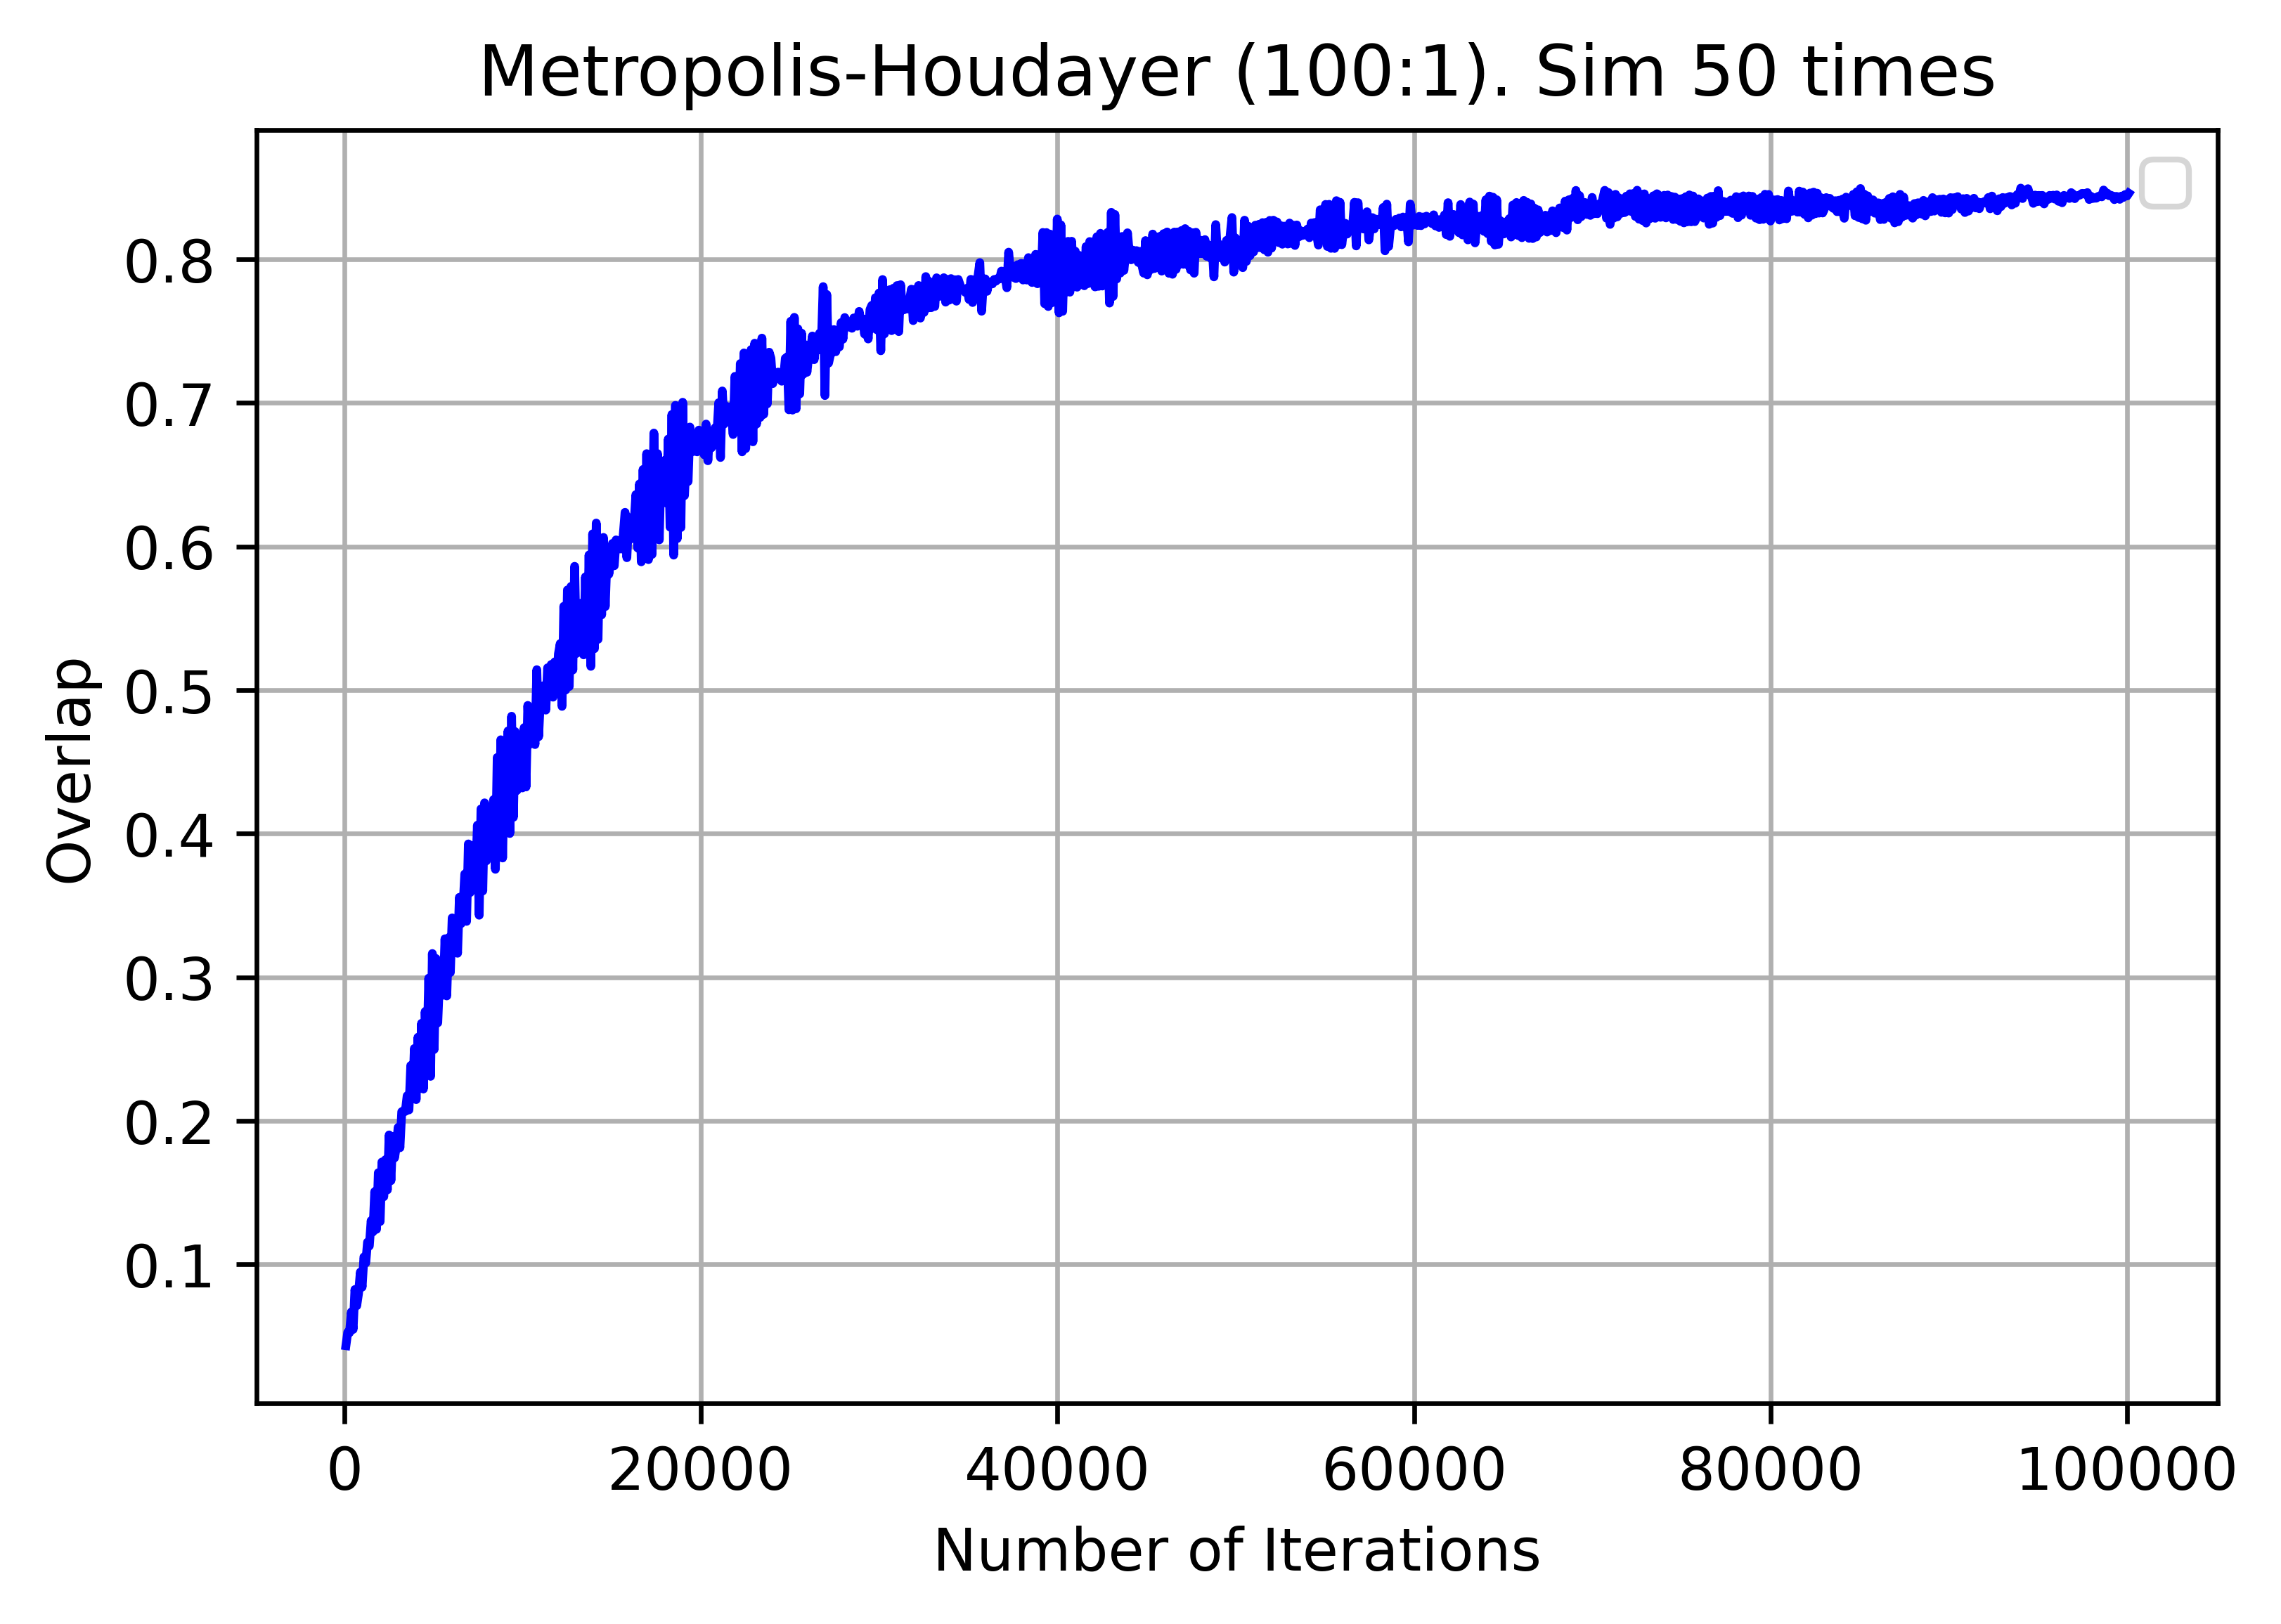

In [20]:
plot_sim(x=t,
         y=total_ov1,
         title=f'Metropolis-Houdayer ({m_steps}:{h_steps}). Sim {num_sims} times',
         x_label='Number of Iterations',
         y_label='Overlap' )